In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | homer
Processing Record 2 of Set 1 | wuwei
Processing Record 3 of Set 1 | beloha
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bantogon
Processing Record 6 of Set 1 | ajdabiya
Processing Record 7 of Set 1 | bandarbeyla
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | mareeba
Processing Record 10 of Set 1 | kavieng
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | waitati
Processing Record 13 of Set 1 | san pedro
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | raudeberg
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | naze
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | lazaro cardenas
Processing Record 20 of Set 1 | owando
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | laredo
Processing Record 23

In [7]:
len(city_data)

554

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Homer,59.6425,-151.5483,58.05,70,100,11.01,US,2022-08-07 20:54:39
1,Wuwei,37.9281,102.6414,68.02,62,5,3.22,CN,2022-08-07 20:54:39
2,Beloha,-25.1667,45.0500,61.16,91,0,6.44,MG,2022-08-07 20:54:39
3,Ushuaia,-54.8000,-68.3000,40.66,56,0,5.75,AR,2022-08-07 20:54:40
4,Bantogon,6.5333,124.0333,76.39,90,100,7.92,PH,2022-08-07 20:54:40
5,Ajdabiya,30.7554,20.2263,80.06,74,0,13.27,LY,2022-08-07 20:54:40
6,Bandarbeyla,9.4942,50.8122,75.61,80,8,32.84,SO,2022-08-07 20:54:41
7,Mareeba,-17.0000,145.4333,66.92,94,97,1.97,AU,2022-08-07 20:54:41
8,Kavieng,-2.5744,150.7967,81.27,80,99,13.35,PG,2022-08-07 20:54:41
9,Hithadhoo,-0.6000,73.0833,81.82,70,100,4.43,MV,2022-08-07 20:52:09


In [9]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Homer,US,2022-08-07 20:54:39,59.6425,-151.5483,58.05,70,100,11.01
1,Wuwei,CN,2022-08-07 20:54:39,37.9281,102.6414,68.02,62,5,3.22
2,Beloha,MG,2022-08-07 20:54:39,-25.1667,45.0500,61.16,91,0,6.44
3,Ushuaia,AR,2022-08-07 20:54:40,-54.8000,-68.3000,40.66,56,0,5.75
4,Bantogon,PH,2022-08-07 20:54:40,6.5333,124.0333,76.39,90,100,7.92
5,Ajdabiya,LY,2022-08-07 20:54:40,30.7554,20.2263,80.06,74,0,13.27
6,Bandarbeyla,SO,2022-08-07 20:54:41,9.4942,50.8122,75.61,80,8,32.84
7,Mareeba,AU,2022-08-07 20:54:41,-17.0000,145.4333,66.92,94,97,1.97
8,Kavieng,PG,2022-08-07 20:54:41,-2.5744,150.7967,81.27,80,99,13.35
9,Hithadhoo,MV,2022-08-07 20:52:09,-0.6000,73.0833,81.82,70,100,4.43


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import time module
import time

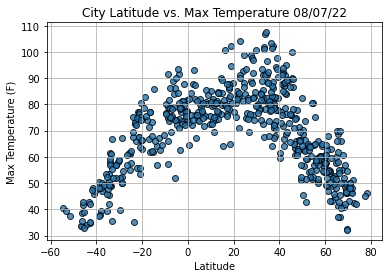

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

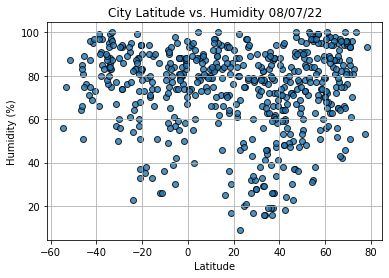

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

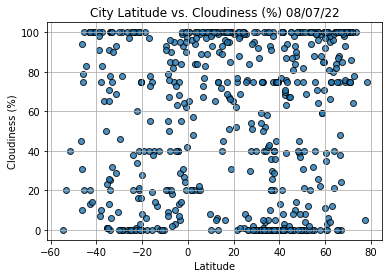

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

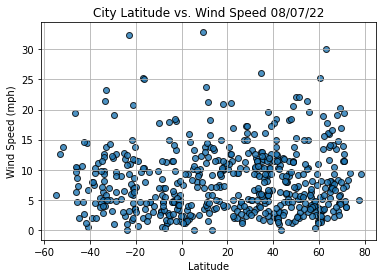

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()